In [69]:
%matplotlib nbagg
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import jit
import time

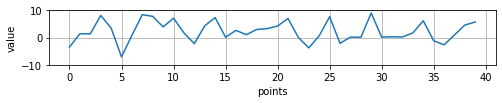

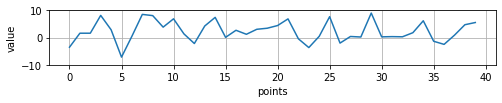

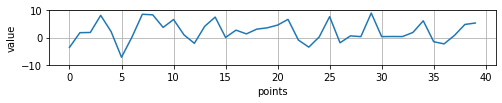

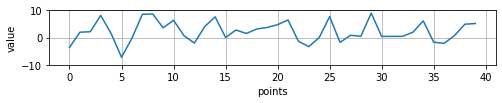

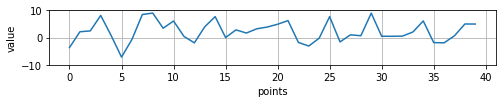

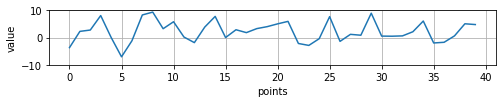

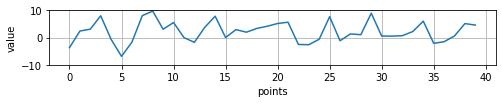

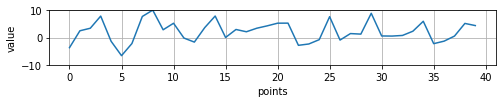

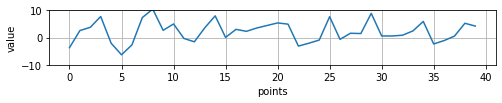

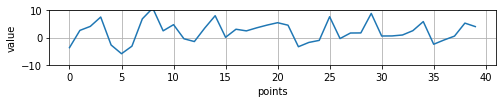

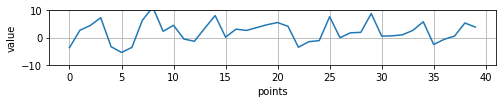

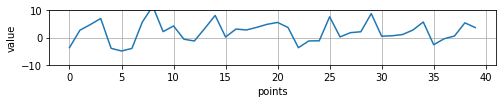

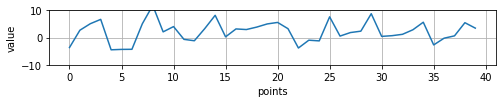

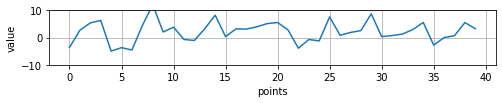

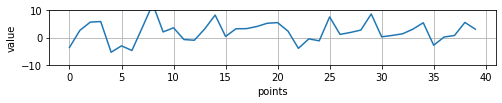

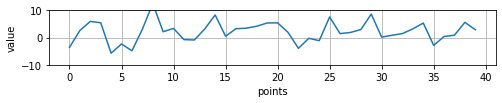

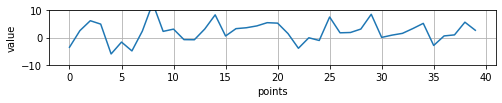

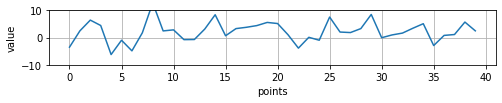

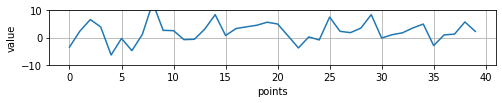

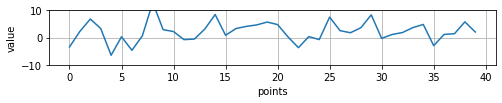

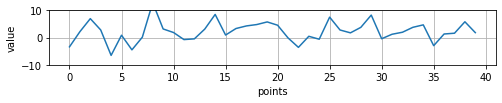

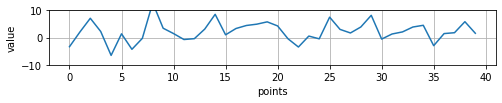

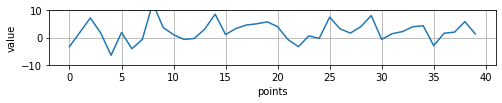

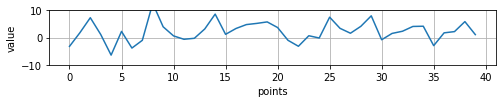

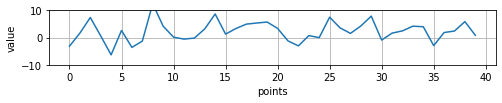

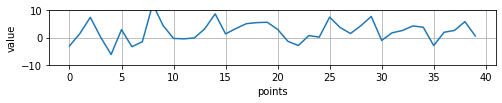

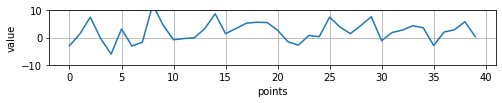

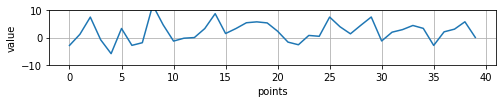

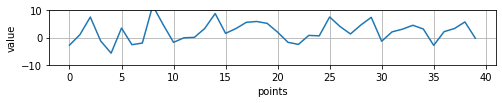

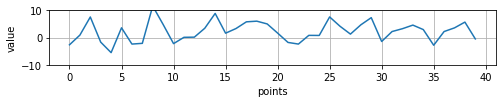

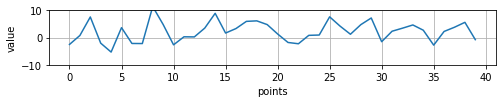

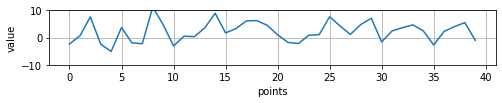

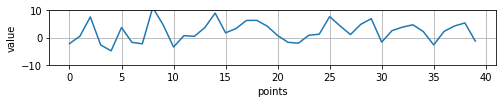

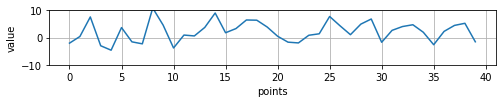

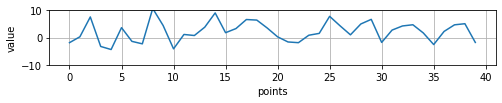

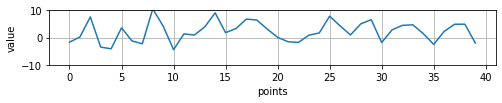

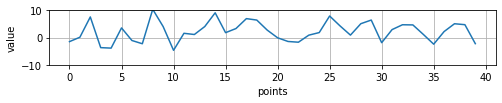

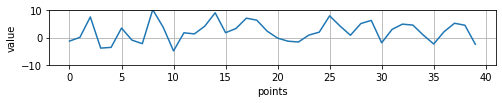

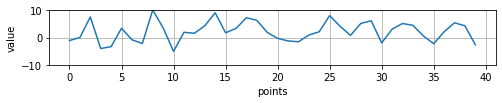

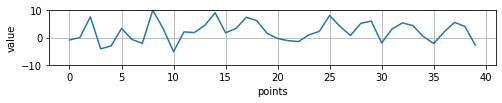

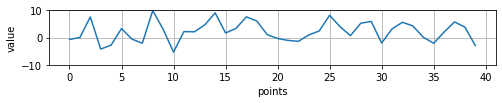

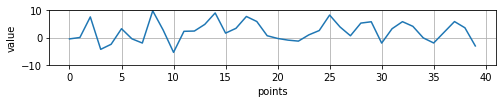

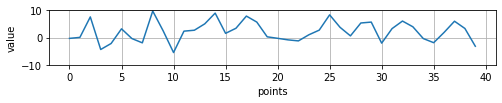

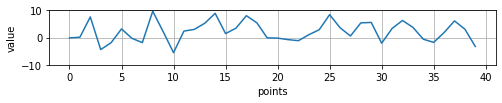

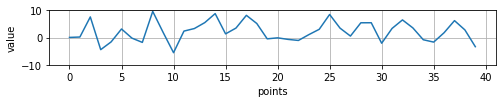

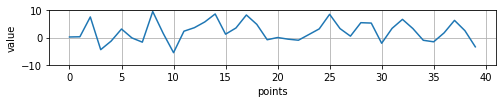

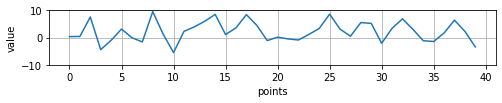

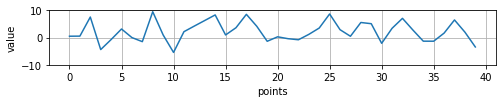

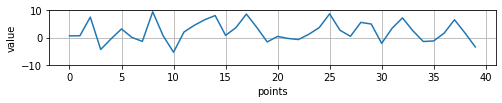

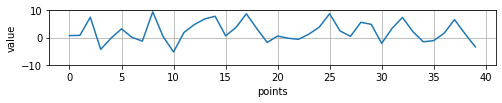

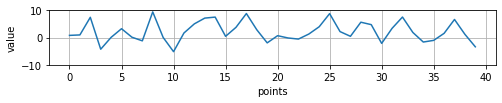

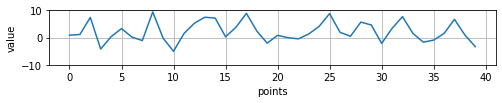

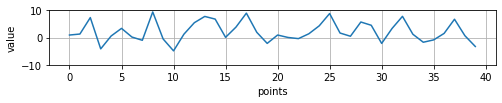

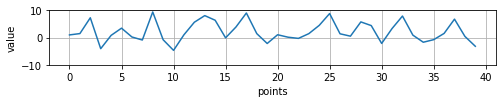

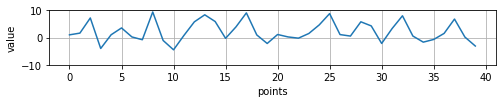

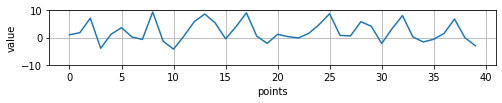

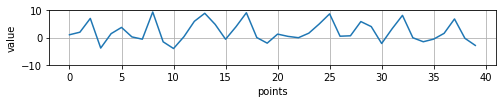

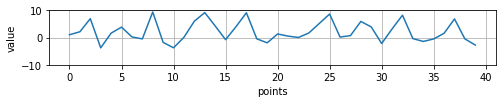

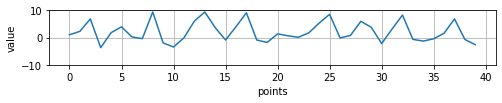

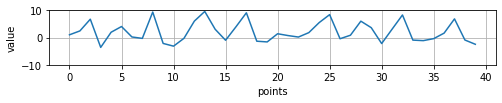

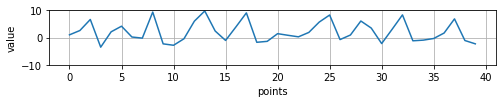

In [70]:
#Runge-Kutta4次で普通の結果を出す．
F = 8.0
K = 40
k = np.empty(K)
k1 = np.empty(K)
k2 = np.empty(K)
k3 = np.empty(K)
k4 = np.empty(K)
Xtmp1 = np.empty(K)
Xtmp2 = np.empty(K)
Xtmp3 = np.empty(K)

@jit
def df(X):
    nextX = np.empty(K)
    for j in range(K):
        if j == 0:
            nextX[j] = (X[j+1] - X[38])*X[39] - X[j] + F
        elif j == 1:
            nextX[j] = (X[j+1] - X[39])*X[j-1] - X[j] + F
        elif j == 39:
            nextX[j] = (X[0] - X[j-2])*X[j-1] - X[j] + F
        else:
            nextX[j] = (X[j+1] - X[j-2])*X[j-1] - X[j] + F
    return nextX

x = np.arange(0, K, 1)
X = np.full(K, F)
X[19] = F*1.001

tstart = 0.0
tend = 4*365*0.05
dt = 0.01
tpoints = np.arange(tstart, tend, dt)

start = time.time()
#一年分スピンアップとして回す
n = 0
for t in tpoints:
    k1 = dt*df(X)
    Xtmp1 = X + k1*0.5
    k2 = dt*df(Xtmp1)
    Xtmp2 = X + k2*0.5
    k3 = dt*df(Xtmp2)
    Xtmp3 = X + k3
    k4 = dt*df(Xtmp3)
    k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    X = X + k

#その後3日分6hごとに取る．
tend = 4*3*0.05
tpoints = np.arange(tstart, tend, dt) 
for t in tpoints:
    k1 = dt*df(X)
    Xtmp1 = X + k1*0.5
    k2 = dt*df(Xtmp1)
    Xtmp2 = X + k2*0.5
    k3 = dt*df(Xtmp2)
    Xtmp3 = X + k3
    k4 = dt*df(Xtmp3)
    k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    X = X + k
    plt.figure(figsize=(8, 1))
    plt.xlabel("points")
    plt.ylabel("value")
    plt.ylim([-10,10])
    plt.grid(True)
    plt.plot(x, X)
    plt.show()




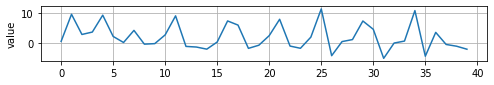

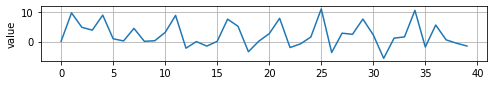

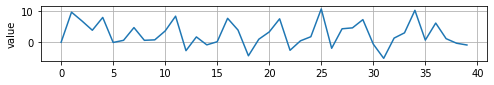

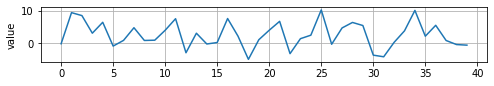

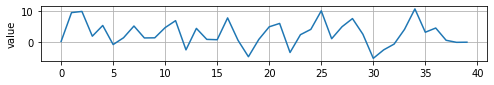

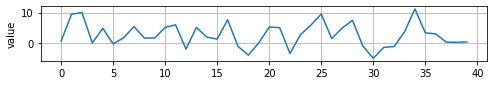

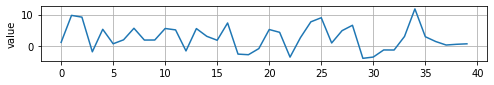

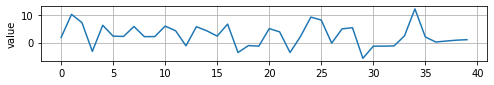

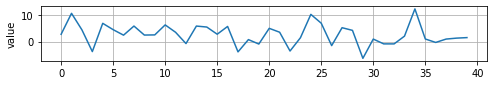

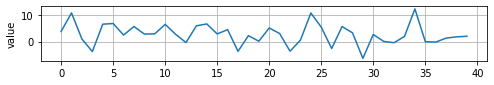

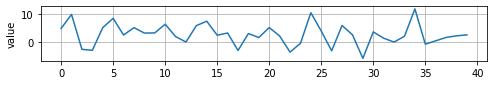

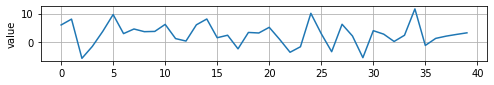

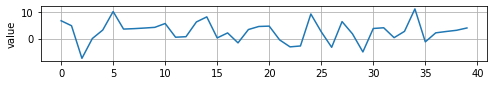

elapsed_time:1.6352460384368896[sec]


In [71]:
########################################
#オイラー法でやる．
#dtはおんなじになるまでどんどん小さくしてく．
#dt = 0.01でおなじになったっぽい
F = 8.0
start = time.time()
x = np.arange(0, K, 1)
X = np.full(K, F)
X[19] = F*1.001

tstart = 0.0
tend = 4*365*0.05
dt = 0.01
tpoints = np.arange(tstart, tend, dt)

#一年分スピンアップとして回す
n = 0
for t in tpoints:
    k = dt*df(X)
    X = X + k

#その後3日分6hごとに取る．
tend = 4*3*0.05
tpoints = np.arange(tstart, tend, dt) 
n = 0
for t in tpoints:
    k = dt*df(X)
    X = X + k
    if(n % 5 == 0):
        plt.figure(figsize=(8, 1))
    #     plt.xlabel("points")
        plt.ylabel("value")
        plt.grid(True)
        plt.plot(x, X)
        plt.show()
    n = n+1
    
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

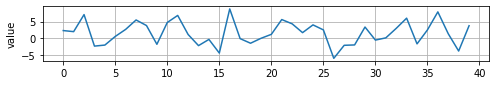

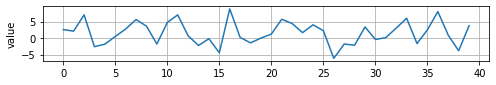

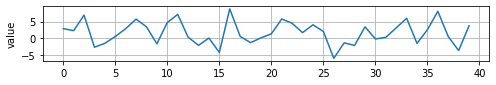

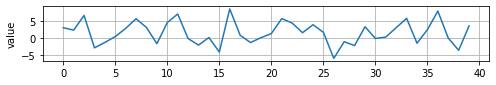

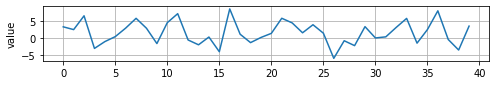

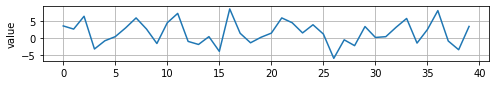

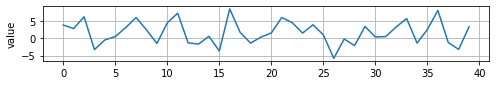

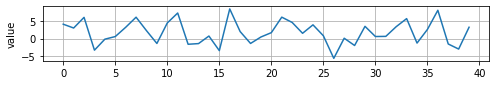

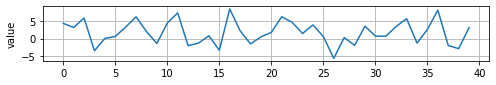

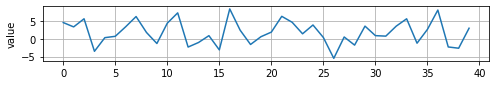

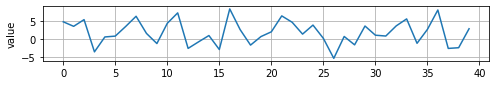

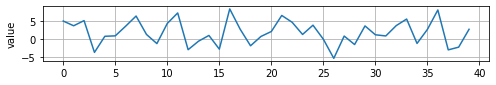

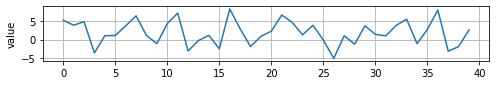

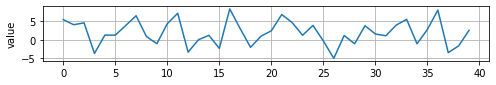

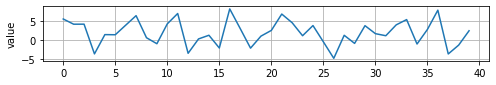

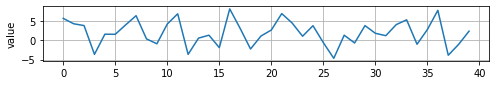

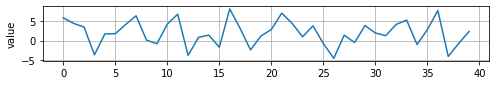

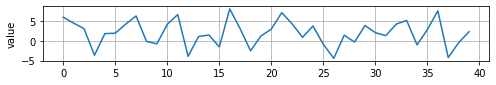

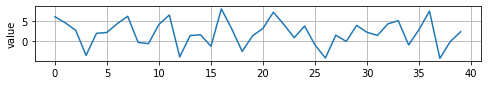

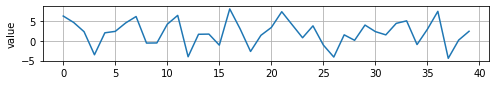

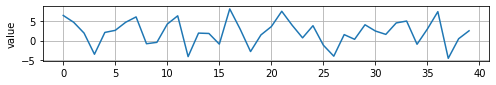

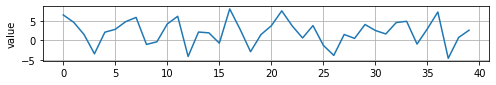

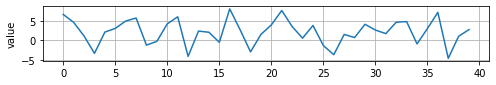

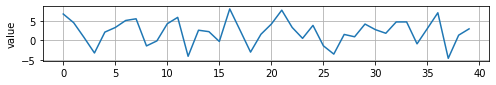

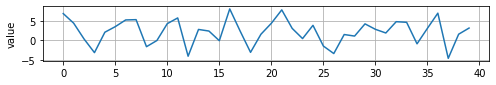

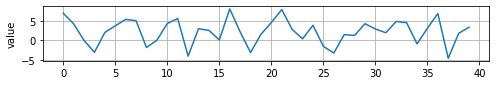

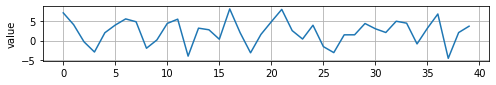

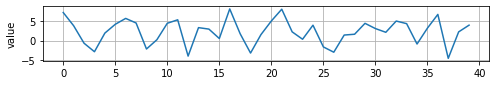

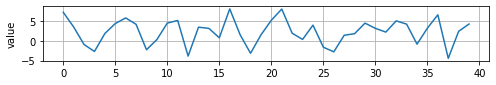

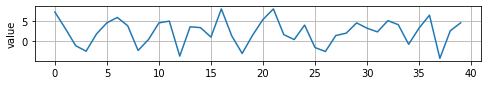

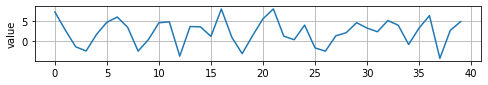

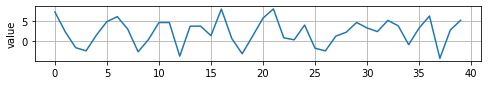

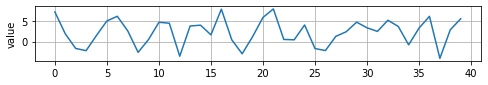

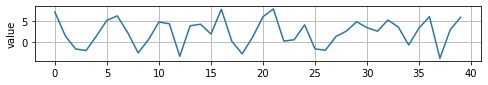

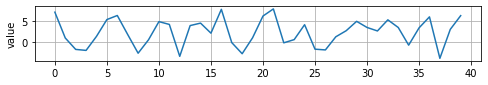

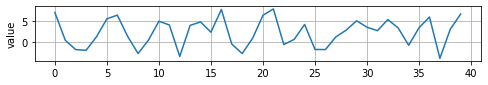

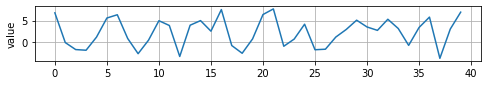

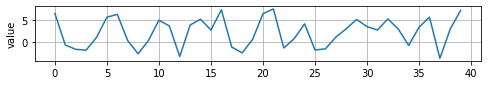

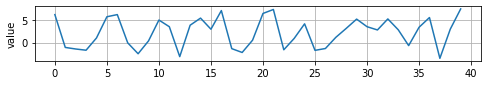

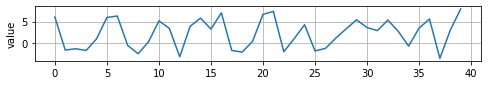

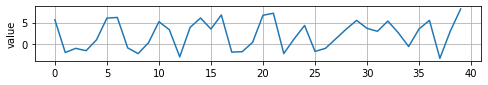

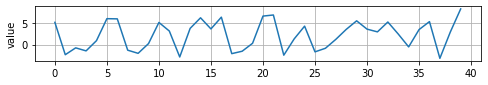

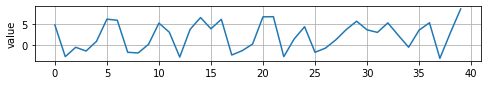

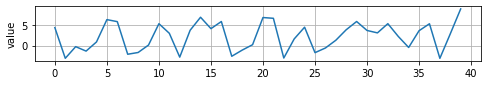

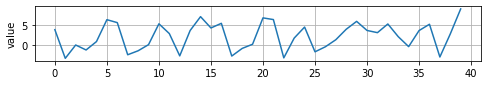

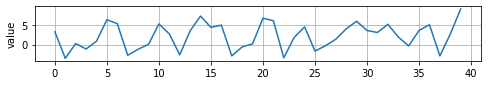

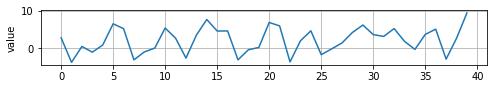

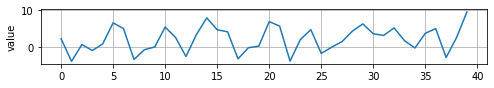

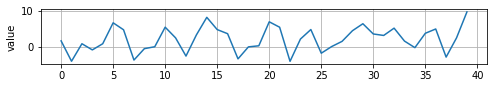

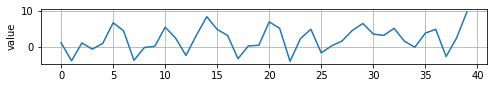

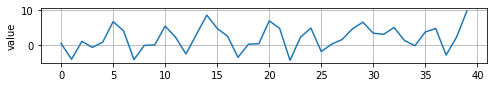

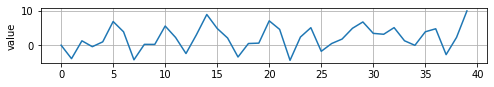

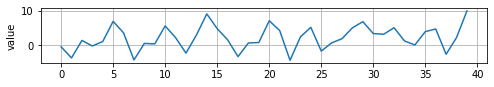

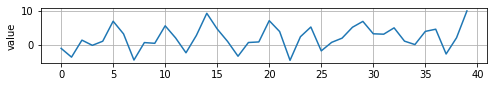

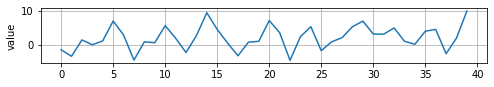

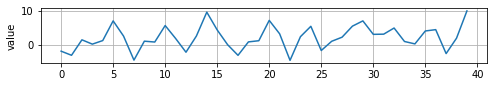

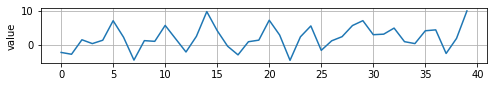

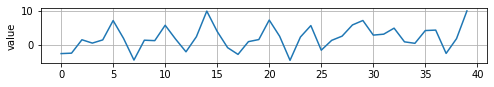

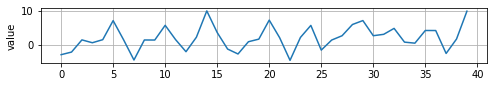

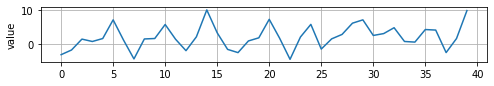

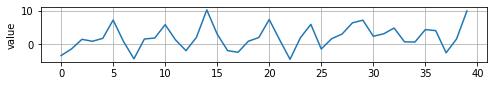

elapsed_time:7.574985027313232[sec]


In [72]:
########################################
#ルンゲクッタ２次でやる．
#dtはおんなじになるまでどんどん小さくしてく．
F = 8.0
start = time.time()
x = np.arange(0, K, 1)
X = np.full(K, F)
X[19] = F*1.001

tstart = 0.0
tend = 4*365*0.05
dt = 0.01
tpoints = np.arange(tstart, tend, dt)

#一年分スピンアップとして回す
n = 0
for t in tpoints:
    k1 = dt*df(X)
    Xtmp1 = X + k1*0.5
    k2 = dt*df(Xtmp1)
    k = (k1 + k2)*0.5
    X = X + k

#その後3日分6hごとに取る．
tend = 4*3*0.05
tpoints = np.arange(tstart, tend, dt) 
n = 0
for t in tpoints:
    k1 = dt*df(X)
    Xtmp1 = X + k1*0.5
    k2 = dt*df(Xtmp1)
    k = (k1 + k2)*0.5
    X = X + k
    
    plt.figure(figsize=(8, 1))
#     plt.xlabel("points")
    plt.ylabel("value")
    plt.grid(True)
    plt.plot(x, X)
    plt.show()
    
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")